In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Found Regression Line: Y =  0.1132911392405063  +  0.08164556962025317 *x


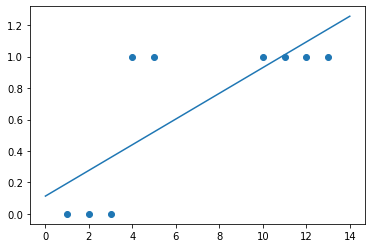

Classifier 1: 3.9179206201550394
Classifier 2: 3.935655813953489
Classifier 3: 3.9778871317829463


In [23]:
def visualize(trainingSet, slopeM, interceptB):
    plt.scatter(x=trainingSet.X, y=trainingSet.Y)
    ablineValues = [slopeM * i + interceptB for i in range(0, 15)]
    plt.plot(ablineValues)
    plt.show()
    pass

def getData(X, Y):
    # data training set, dataFrame of X and Y values
    data = np.stack((X, Y), axis=-1)
    trainSet = pd.DataFrame(data, columns=["X", "Y"])
    return trainSet

# returns dot product of the dataFrame but it is 1D data?
def dotProd(input):
    return np.dot(input.X, input.Y)

# returns square of X values
def xSquared(trainSet):
    #print(sum(trainSet.X * trainSet.X))
    return sum(trainSet.X * trainSet.X)

# least squares regression -- not sure if this is the correct implementation but we get a line?
def leastSquaresRegression(sumX, sumXSquared, sumY, dotProdXY, n):
    slope = (n * dotProdXY - sumX * sumY) / (n * sumXSquared - sumX * sumX)
    # xMean = int(sumX / n)
    # yMean = int(sumY / n)
    intercept = (sumY - slope * sumX) / n
    # a = yMean - b * xMean
    print("Found Regression Line: Y = ", intercept, " + ", slope, "*x")
    # the above values were reversed.
    return slope, intercept

# Determines our classifier position
def classifierval(y, classint, classslope):
        return (y - classint)/classslope

if __name__ == "__main__":
    # Need to use these from professor:
    X = [1, 2, 3, 4, 5, 10, 11, 12, 13]
    Y = [0, 0, 0, 1, 1, 1, 1, 1, 1]

    trainSet = getData(X, Y)
    n = len(trainSet.X)
    # initialize variables for slope and intercept
    sumX = sum(trainSet.X)
    sumXSquared = xSquared(trainSet)
    sumY = sum(trainSet.Y)
    dotProdXY = dotProd(trainSet)
    m, b = leastSquaresRegression(sumX, sumXSquared, sumY, dotProdXY, n)
    visualize(trainSet, m, b)
    
    # figure out our classifier position on the regression slope with these y values
    cl1 = classifierval(0.433172, b, m)
    cl2 = classifierval(0.43462, b, m)
    cl3 = classifierval(0.438068, b, m)
    print("Classifier 1:", cl1)
    print("Classifier 2:", cl2)
    print("Classifier 3:", cl3)


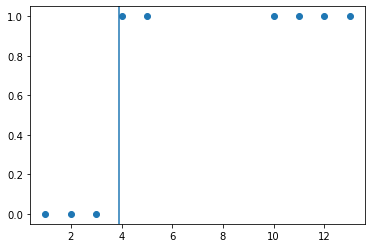

In [24]:
# Prints graph with classifier 
def visualize2(trainingSet, slopeM, interceptB, classifier):
    plt.scatter(x=trainingSet.X, y=trainingSet.Y)
    plt.axvline(x = classifier)
    plt.show()
visualize2(trainSet, m, b, cl1)

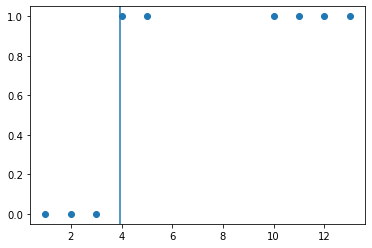

In [25]:
# Prints graph with classifier 
visualize2(trainSet, m, b, cl2)

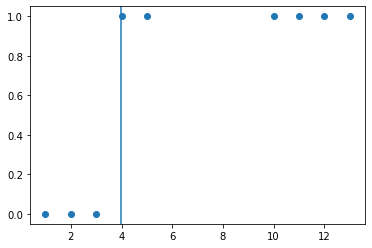

In [26]:
# Prints graph with classifier 
visualize2(trainSet, m, b, cl3)